## Ejercicio

**Entrenando un modelo con PCA**

Considerando `xtrain`, `ytrain` definido en las céldas de arriba, crea dos modelos:

1. Un `pipeline` considerando PCA con `n_components=0.7` seguido de un modelo 


2. `KNeighborsClassifier` con `n_neighbors=5`


Realiza un cross validation con `n_components=3`.
* ¿Qué resultados arroja cada modelo?
* ¿Que ventajas tiene cada modelo?
* ¿Cuánto tarda en correr cada cross-validation?

In [11]:
from tensorflow.keras import datasets
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy.random import randn, seed
from scipy.linalg import norm
from sklearn.datasets import make_moons
from ipywidgets import interact, FloatSlider, Dropdown, IntSlider
from sklearn.datasets import make_biclusters, make_moons


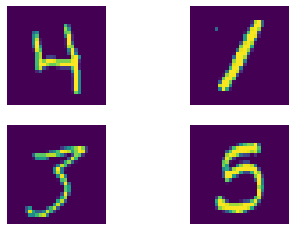

In [4]:
train, test = datasets.mnist.load_data()
xtrain, ytrain = train

np.random.seed(3141)
indices = np.random.choice(np.arange(len(xtrain)), size=4)
fig, ax = plt.subplots(2, 2)
for axi, ix in zip(ax.ravel(), indices):
    axi.imshow(xtrain[ix])
    axi.axis("off")

In [5]:
N, M1, M2 = xtrain.shape
X = xtrain.reshape(N, -1)

In [10]:
xtest, ytest = test
N_t, M1_t, M2_t = xtest.shape
Xtest = xtrain.reshape(N_t, -1)

In [24]:
%%time
pipe = Pipeline([
    ("PCA", PCA(n_components=.7)),
    ("KNN", KNeighborsClassifier(n_neighbors=5,n_jobs=-1))
])
cv_1=cross_validate(pipe, X, ytrain, cv=3, scoring=["accuracy"],n_jobs=-1)


Wall time: 24.9 s


In [25]:
#Presición cross-validation train set
cv_1["test_accuracy"].mean()

0.9711666666666666

In [18]:
%%time
knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
cv=cross_validate(knn, X, ytrain, cv=3, scoring=["accuracy"], n_jobs=-1)

Wall time: 15min 26s


In [19]:
cv["test_accuracy"].mean()

0.9674166666666667

In [32]:
print(f"""1. ¿Qué resultados arroja cada modelo? usando accuracy
El primer modelo tiene un accuracy de {cv_1['test_accuracy'].mean():.4f}
El segundo modelo tiene un accuracy de {cv['test_accuracy'].mean():.4f}""")

1. ¿Qué resultados arroja cada modelo? usando accuracy
El primer modelo tiene un accuracy de 0.9712
El segundo modelo tiene un accuracy de 0.9674


2. ¿Qué ventajas tiene cada modelo?

El primer modelo tiene una clara ventaja en cuanto al tiempo que tomo su ejecución, pues fue 29 veces más rápido que le segundo modelo, además de que tuvo un mejor accuracy con cv.  

Por otro lado, el segundo modelo contiene toda la información, lo cual, puede ser ventajozo.

In [35]:
print(f"""3. ¿Cuánto tarda en correr cada cross-validation?
El primer modelo tardó {24.9}s
El segundo modelo tardó {15} min {26}s""")

3. ¿Cuánto tarda en correr cada cross-validation?
El primer modelo tardó 24.9s
El segundo modelo tardó 15 min 26s
